## 삼성전자 주가 데이터 불러오기

In [1]:
!pip install ta

In [18]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import ta

df = fdr.DataReader('005930','2004-11-16', '2024-08-16')

### 파생 변수 생성하기
#### 각종 경제지표

In [19]:
# 볼린저밴드
bb = ta.volatility.BollingerBands(close=df['Close'], window=20, fillna=False)
df['PB'] = bb.bollinger_pband()
df['BandWidth'] = bb.bollinger_wband()

In [20]:
# DMI, ADX
# dmi = ta.trend.ADXIndicator(high=df['High'], low=df['Low'], close=df['Close'], window=14, fillna=False)
# df['PDI'],df['MDI'],df['ADX'] = dmi.adx_pos(),dmi.adx_neg(),dmi.adx()

pdiff, ndiff = df['High'].diff(1), df['Low'].diff(1)
pdm = pd.Series(np.where((pdiff > 0) & (pdiff > -ndiff), pdiff, 0), index=df.index)
ndm = pd.Series(np.where((-ndiff > 0) & (-ndiff > pdiff), -ndiff, 0), index=df.index)

tr = pd.DataFrame()
tr['1'] = df['High'] - df['Low']
tr['2'] = (df['High'] - df['Close'].shift(-1)).abs()
tr['3'] = (df['Low'] - df['Close'].shift(-1)).abs()
tr = tr.max(axis = 1)

def sum_index(df,nums):
    sum = pd.Series(np.nan, index=df.index)
    sum.iloc[13] = nums[0:14].sum()
    for i in range(14,len(df)):
        sum.iloc[i] = sum.iloc[i-1] - sum.iloc[i-1]/14 + nums.iloc[i]
    return sum

pdmn, ndmn, trn = sum_index(df,pdm), sum_index(df,ndm), sum_index(df,tr)

df['PDI'], df['MDI'] = pdmn/trn*100, ndmn/trn*100
dx = ((df['PDI']-df['MDI']).abs()) / (df['PDI']+df['MDI']) * 100

adx = pd.Series(np.nan, index=df.index)
adx.iloc[26] = dx[13:27].mean()
for i in range(27,len(df)):
    adx.iloc[i] = (adx.iloc[i-1]*13 + dx.iloc[i])/14

df['ADX'] = adx

In [21]:
# WMA (가중이동평균)
df['CWMA'] = ta.trend.WMAIndicator(close=df['Close'], window=5, fillna=False).wma()
df['VWMA'] = ta.trend.WMAIndicator(close=df['Volume'], window=5, fillna=False).wma()

In [22]:
# MACD
#df['MACD'] = ta.trend.macd(close=df['Close'], window_slow=26, window_fast=12, fillna=False)
df['MACD_sig'] = ta.trend.macd_signal(close=df['Close'], window_slow=26, window_fast=12, window_sign=9, fillna=False)

In [23]:
# RSI
df['RSI'] = ta.momentum.rsi(close=df['Close'], window=14, fillna=False)
#df['RSI_sig'] = df['RSI'].rolling(9).mean()

In [24]:
# STOCHASTIC FAST
df['%K'] = ta.momentum.stoch(high=df['High'], low=df['Low'], close=df['Close'], window=14, smooth_window=3, fillna=False)
df['%D'] = ta.momentum.stoch_signal(high=df['High'], low=df['Low'], close=df['Close'], window=14, smooth_window=3, fillna=False)

# STOCAHSTIC SLOW (FAST와 SLOW 둘 중 하나를 반영해야 함)
# #장기기간 분석하므로, 노이즈 감소를 위해 slow사용
# df['Slow_%K'] = df['%D']
# df['Slow_%D'] = df['Slow_%K'].rolling(3).mean()

In [25]:
df

,Open,High,Low,Close,Volume,Change,PB,BandWidth,PDI,MDI,ADX,CWMA,VWMA,MACD_sig,RSI,%K,%D
Date,,,,,,,,,,,,,,,,,
2004-11-16,9180,9200,9100,9110,495098,-0.002191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-17,9120,9250,9110,9230,439562,0.013172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-18,9300,9390,9200,9270,588572,0.004334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-19,9200,9320,8990,9080,445179,-0.020496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-22,8840,8910,8730,8800,691533,-0.030837,NaN,NaN,NaN,NaN,NaN,9046.666667,5.585546e+05,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-09,75700,75800,74200,74700,16388222,0.017711,0.185381,24.377061,19.726125,32.691508,24.093548,73840.000000,2.952870e+07,-1241.965020,38.460203,28.301887,25.576520
2024-08-12,75200,75900,74800,75500,9839259,0.010710,0.251606,24.276895,19.352107,31.675436,24.097605,74560.000000,2.084730e+07,-1457.501162,40.593091,33.333333,27.253669
2024-08-13,76500,76600,75500,76100,10716261,0.007947,0.303029,23.327003,20.267308,30.347132,23.798841,75206.666667,1.544286e+07,-1612.077412,42.210815,37.106918,32.914046


In [26]:
window_size = 20  # 예: 20일 이동 평균
#변동성
df['Volatility'] = df['Close'].rolling(window=window_size).std()

#CHANGE 변수 삭제
df = df.drop('Change', axis=1)
df

,Open,High,Low,Close,Volume,PB,BandWidth,PDI,MDI,ADX,CWMA,VWMA,MACD_sig,RSI,%K,%D,Volatility
Date,,,,,,,,,,,,,,,,,
2004-11-16,9180,9200,9100,9110,495098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-17,9120,9250,9110,9230,439562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-18,9300,9390,9200,9270,588572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-19,9200,9320,8990,9080,445179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-22,8840,8910,8730,8800,691533,NaN,NaN,NaN,NaN,NaN,9046.666667,5.585546e+05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-09,75700,75800,74200,74700,16388222,0.185381,24.377061,19.726125,32.691508,24.093548,73840.000000,2.952870e+07,-1241.965020,38.460203,28.301887,25.576520,5058.653347
2024-08-12,75200,75900,74800,75500,9839259,0.251606,24.276895,19.352107,31.675436,24.097605,74560.000000,2.084730e+07,-1457.501162,40.593091,33.333333,27.253669,5002.996471
2024-08-13,76500,76600,75500,76100,10716261,0.303029,23.327003,20.267308,30.347132,23.798841,75206.666667,1.544286e+07,-1612.077412,42.210815,37.106918,32.914046,4772.539322


In [28]:
# 결측치 제거
df = df.dropna(axis=0)

## 파생변수 생성

* STOCHASTIC Fast에서 %K 선이 20 아래에 있다면 과매도, 80 위에 있다면 과매수 구간

* RSI에서 보통 RSI 70 이상을 과매수 상태로, RSI 30 이하를 과매도 상태

In [29]:
# 과매수/과매도 라벨링
def label_condition(row):
    if row['%K'] < 20 or row['RSI'] < 30:
        return 'Oversold'  # 과매도
    elif row['%K'] > 80 or row['RSI'] > 70:
        return 'Overbought'  # 과매수
    else:
        return 'Neutral'  # 중립

df['condition'] = df.apply(label_condition, axis=1)

# 원핫 인코딩 수행
df = pd.get_dummies(df, columns=['condition'])
df

,Open,High,Low,Close,Volume,PB,BandWidth,PDI,MDI,ADX,CWMA,VWMA,MACD_sig,RSI,%K,%D,Volatility,condition_Neutral,condition_Overbought,condition_Oversold
Date,,,,,,,,,,,,,,,,,,,,
2005-01-03,9050,9060,8920,9020,218558,0.830672,14.216802,25.061785,16.666227,21.032303,8933.333333,2.854477e+05,8.026895,60.868231,96.078431,95.071968,314.148808,0,1,0
2005-01-04,9000,9020,8920,8940,280347,0.740158,14.258669,23.820406,15.840703,20.967119,8954.000000,2.846097e+05,18.353520,57.163053,82.857143,92.658012,316.134548,0,1,0
2005-01-05,8800,8860,8730,8860,467322,0.655719,13.619401,22.614102,21.052193,19.724962,8935.333333,3.431052e+05,26.295688,53.646292,56.521739,78.485771,303.078937,1,0,0
2005-01-06,8780,8910,8700,8700,343063,0.507378,13.255827,22.693955,19.645938,18.830245,8854.000000,3.472080e+05,29.714342,47.369459,21.739130,53.706004,295.515161,1,0,0
2005-01-07,8820,8830,8710,8810,272369,0.583858,12.445985,21.797913,18.870243,17.999436,8822.000000,3.276877e+05,31.805796,51.565263,45.652174,41.304348,278.339059,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-09,75700,75800,74200,74700,16388222,0.185381,24.377061,19.726125,32.691508,24.093548,73840.000000,2.952870e+07,-1241.965020,38.460203,28.301887,25.576520,5058.653347,1,0,0
2024-08-12,75200,75900,74800,75500,9839259,0.251606,24.276895,19.352107,31.675436,24.097605,74560.000000,2.084730e+07,-1457.501162,40.593091,33.333333,27.253669,5002.996471,1,0,0
2024-08-13,76500,76600,75500,76100,10716261,0.303029,23.327003,20.267308,30.347132,23.798841,75206.666667,1.544286e+07,-1612.077412,42.210815,37.106918,32.914046,4772.539322,1,0,0


In [30]:
investor_trends_df = pd.read_csv('투자자별 매매동향(삼성전자).csv')
investor_trends_df

# 0인 값을 가진 행들을 필터링한 새로운 데이터프레임 생성
# 0행을 컬럼명으로 설정
investor_trends_df.columns = investor_trends_df.iloc[0]

# 0행을 삭제하여 나머지 데이터만 남김
investor_trends_df = investor_trends_df.drop(investor_trends_df.index[0])

# 인덱스를 리셋 (필요시)
investor_trends_df = investor_trends_df.reset_index(drop=True)

#기업, 개인 , 외국인 추가해서 칼럼명 변경
investor_trends_df.columns.values[4] = '기업 거래량'
investor_trends_df.columns.values[5] = '개인 순매매량'
investor_trends_df.columns.values[6] = "외국인 순매매량"
investor_trends_df.columns.values[7] = "외국인 보유주수"
investor_trends_df.columns.values[8] = "외국인 보유율"

#종가 삭제
investor_trends_df = investor_trends_df.drop('종가', axis=1)


#등락률, 보유율 % 처리
# '등락률' 열을 실수 값으로 변환 (100으로 나눔)
investor_trends_df['등락률'] = investor_trends_df['등락률'].str.rstrip('%').astype(float) / 100.0
# '외국인 보유율' 열을 실수 값으로 변환 (100으로 나눔)
investor_trends_df['외국인 보유율'] = investor_trends_df['외국인 보유율'].str.rstrip('%').astype(float) / 100.0

investor_trends_df

,날짜,전일비,등락률,기업 거래량,개인 순매매량,외국인 순매매량,외국인 보유주수,외국인 보유율
0,2024.08.21,-600,-0.0076,"7,734,771","+177,643","+82,341","3,357,989,044",0.5625
1,2024.08.20,600,0.0077,"10,683,836","-141,999","+924,485","3,357,906,703",0.5625
2,2024.08.19,-1900,-0.0237,"14,146,565","-339,031","-1,468,641","3,356,978,020",0.5623
3,2024.08.16,3000,0.0389,"22,061,478","+918,078","+6,540,655","3,358,563,961",0.5626
4,2024.08.14,1100,0.0145,"13,246,168","-230,603","+2,054,899","3,352,025,208",0.5615
...,...,...,...,...,...,...,...,...
4849,2005.01.07,5500,0.0126,"272,369","-73,660","+71,587","79,831,619",0.5420
4850,2005.01.06,-8000,-0.0181,"343,063","-56,059","+3,706","79,760,032",0.5415
4851,2005.01.05,-4000,-0.0089,"467,322","-9,961","+1,683","79,752,966",0.5414
4852,2005.01.04,-4000,-0.0089,"280,347","-31,824","+18,352","79,751,333",0.5414


In [33]:
#데이터프레임 합치기
# '날짜' 칼럼을 년-월-일 형식으로 변환
investor_trends_df['날짜'] = pd.to_datetime(investor_trends_df['날짜'], format='%Y.%m.%d')

# df의 인덱스와 investor_trends_df의 날짜를 기준으로 병합
merged_df = df.merge(investor_trends_df, left_index=True, right_on='날짜')

#인덱스 초기화
merged_df = merged_df.reset_index()
merged_df

,index,Open,High,Low,Close,Volume,PB,BandWidth,PDI,MDI,...,condition_Overbought,condition_Oversold,날짜,전일비,등락률,기업 거래량,개인 순매매량,외국인 순매매량,외국인 보유주수,외국인 보유율
0,4853,9050,9060,8920,9020,218558,0.830672,14.216802,25.061785,16.666227,...,1,0,2005-01-03,500,0.0011,"218,558","+32,006","-6,036","79,732,931",0.5413
1,4852,9000,9020,8920,8940,280347,0.740158,14.258669,23.820406,15.840703,...,1,0,2005-01-04,-4000,-0.0089,"280,347","-31,824","+18,352","79,751,333",0.5414
2,4851,8800,8860,8730,8860,467322,0.655719,13.619401,22.614102,21.052193,...,0,0,2005-01-05,-4000,-0.0089,"467,322","-9,961","+1,683","79,752,966",0.5414
3,4850,8780,8910,8700,8700,343063,0.507378,13.255827,22.693955,19.645938,...,0,0,2005-01-06,-8000,-0.0181,"343,063","-56,059","+3,706","79,760,032",0.5415
4,4849,8820,8830,8710,8810,272369,0.583858,12.445985,21.797913,18.870243,...,0,0,2005-01-07,5500,0.0126,"272,369","-73,660","+71,587","79,831,619",0.5420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4846,7,75700,75800,74200,74700,16388222,0.185381,24.377061,19.726125,32.691508,...,0,0,2024-08-09,1300,0.0177,"16,388,222","-21,816","+556,506","3,347,500,307",0.5607
4847,6,75200,75900,74800,75500,9839259,0.251606,24.276895,19.352107,31.675436,...,0,0,2024-08-12,800,0.0107,"9,839,259","+112,759","+473,898","3,347,828,165",0.5608
4848,5,76500,76600,75500,76100,10716261,0.303029,23.327003,20.267308,30.347132,...,0,0,2024-08-13,600,0.0079,"10,716,261","-202,595","+1,857,644","3,349,911,209",0.5611
4849,4,77400,77800,77000,77200,13246168,0.381179,22.183752,21.617454,27.969496,...,0,0,2024-08-14,1100,0.0145,"13,246,168","-230,603","+2,054,899","3,352,025,208",0.5615


In [41]:
# # 감성분석 피처 가져오면 병합하기!!!! (변수 추가끝!!!)

# # 감성분석 데이터 가져오기
# sentiment_df = pd.read_csv('.csv')

# # 시간 3시 30분 이후는 다음날 날짜로 바꾸기


# # 시간 칼럼 삭제


# # 같은 날짜끼리 병합하기
# merged_df = merged_df.merge(sentiment_df, left_index=True, right_on='날짜')


## 전처리

In [55]:
# from sklearn.preprocessing import MinMaxScaler

#날짜 칼럼 삭제
merged_df = merged_df.drop('날짜',axis=1)

# ,(콤마) 삭제
merged_df = merged_df.replace(',', '', regex=True)

scaler = MinMaxScaler()
# 스케일 후 columns
scaled = scaler.fit_transform(merged_df)

#스케일 적용한 값으로 데이터 프레임 만들기
scaled_df = pd.DataFrame(scaled, columns=merged_df.columns, index = merged_df.index)
scaled_df

,index,Open,High,Low,Close,Volume,PB,BandWidth,PDI,MDI,...,condition_Neutral,condition_Overbought,condition_Oversold,전일비,등락률,기업 거래량,개인 순매매량,외국인 순매매량,외국인 보유주수,외국인 보유율
0,1.000000,0.100221,0.093595,0.099665,0.010501,0.002420,0.655497,0.336536,0.504838,0.178047,...,0.0,1.0,0.0,0.570565,0.517344,0.002420,0.766516,0.576227,0.023024,0.933115
1,0.999794,0.099668,0.093182,0.099665,0.009535,0.003104,0.606235,0.337713,0.475880,0.166593,...,0.0,1.0,0.0,0.552419,0.480045,0.003104,0.764952,0.576672,0.023030,0.933287
2,0.999588,0.097453,0.091529,0.097542,0.008570,0.005175,0.560278,0.319744,0.447740,0.238902,...,1.0,0.0,0.0,0.552419,0.480045,0.005175,0.765488,0.576368,0.023030,0.933287
3,0.999381,0.097231,0.092045,0.097207,0.006639,0.003799,0.479543,0.309524,0.449603,0.219390,...,1.0,0.0,0.0,0.536290,0.445729,0.003799,0.764359,0.576405,0.023032,0.933460
4,0.999175,0.097674,0.091219,0.097318,0.007966,0.003016,0.521168,0.286761,0.428700,0.208627,...,1.0,0.0,0.0,0.590726,0.560239,0.003016,0.763927,0.577644,0.023053,0.934322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4846,0.000825,0.838317,0.783058,0.829050,0.803259,0.181474,0.304294,0.622128,0.380371,0.400397,...,1.0,0.0,0.0,0.573790,0.579261,0.181474,0.765197,0.586501,0.966648,0.966557
4847,0.000619,0.832780,0.784091,0.835754,0.812915,0.108954,0.340338,0.619312,0.371647,0.386299,...,1.0,0.0,0.0,0.571774,0.553152,0.108954,0.768494,0.584993,0.966743,0.966730
4848,0.000412,0.847176,0.791322,0.843575,0.820157,0.118666,0.368325,0.592612,0.392996,0.367869,...,1.0,0.0,0.0,0.570968,0.542708,0.118666,0.760769,0.610267,0.967345,0.967247
4849,0.000206,0.857143,0.803719,0.860335,0.833434,0.146681,0.410859,0.560476,0.424491,0.334880,...,1.0,0.0,0.0,0.572984,0.567326,0.146681,0.760083,0.613869,0.967955,0.967937


In [44]:
# #매매동향에 - 값이 있어서 minmax가 아닌 다른 스케일링 사용했는데 성능이 더 낮아서.. 그냥 minmax로 일단함
# from sklearn.preprocessing import StandardScaler

# #날짜 칼럼 삭제
# merged_df = merged_df.drop('날짜',axis=1)

# # ,(콤마) 삭제
# merged_df = merged_df.replace(',', '', regex=True)

# scaler = StandardScaler()
# scaled = scaler.fit_transform(merged_df)

# scaled_df = pd.DataFrame(scaled, columns=merged_df.columns, index = merged_df.index)
# scaled_df

,index,Open,High,Low,Close,Volume,PB,BandWidth,PDI,MDI,...,condition_Neutral,condition_Overbought,condition_Oversold,전일비,등락률,기업 거래량,개인 순매매량,외국인 순매매량,외국인 보유주수,외국인 보유율
0,1.731694,-1.147555,-1.152678,-1.148101,-1.151593,-0.597204,0.917639,0.687211,0.586327,-0.543755,...,-1.037606,1.632993,-0.51375,0.002396,0.027412,-0.597205,0.096578,0.003337,-0.678682,0.892548
1,1.730980,-1.149787,-1.154449,-1.148101,-1.155170,-0.590007,0.641273,0.695883,0.377500,-0.678924,...,-1.037606,1.632993,-0.51375,-0.260648,-0.532345,-0.590009,0.046105,0.016963,-0.678669,0.895591
2,1.730266,-1.158713,-1.161534,-1.156657,-1.158746,-0.568229,0.383452,0.563472,0.174574,0.174390,...,0.963757,-0.612372,-0.51375,-0.260648,-0.532345,-0.568231,0.063393,0.007650,-0.678668,0.895591
3,1.729551,-1.159606,-1.159320,-1.158008,-1.165899,-0.582702,-0.069478,0.488165,0.188007,-0.055866,...,0.963757,-0.612372,-0.51375,-0.494465,-1.047322,-0.582704,0.026942,0.008780,-0.678664,0.898634
4,1.728837,-1.157820,-1.162863,-1.157558,-1.160982,-0.590936,0.164040,0.320424,0.037273,-0.182876,...,0.963757,-0.612372,-0.51375,0.294666,0.671133,-0.590938,0.013024,0.046705,-0.678615,0.913850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4846,-1.728837,1.827146,1.802771,1.791564,1.784725,1.286127,-1.052633,2.791689,-0.311246,2.080178,...,0.963757,-0.612372,-0.51375,0.049159,0.956609,1.286127,0.054019,0.317628,1.532234,1.482907
4847,-1.729551,1.804830,1.807199,1.818583,1.820490,0.523349,-0.850429,2.770941,-0.374164,1.913809,...,0.963757,-0.612372,-0.51375,0.019932,0.564779,0.523348,0.160432,0.271475,1.532456,1.485950
4848,-1.730266,1.862852,1.838197,1.850105,1.847314,0.625496,-0.693418,2.574192,-0.220207,1.696317,...,0.963757,-0.612372,-0.51375,0.008241,0.408047,0.625495,-0.088928,1.044572,1.533866,1.495079
4849,-1.730980,1.903020,1.891337,1.917653,1.896491,0.920162,-0.454801,2.337392,0.006916,1.307009,...,0.963757,-0.612372,-0.51375,0.037468,0.777487,0.920162,-0.111075,1.154778,1.535296,1.507251


## 시각화

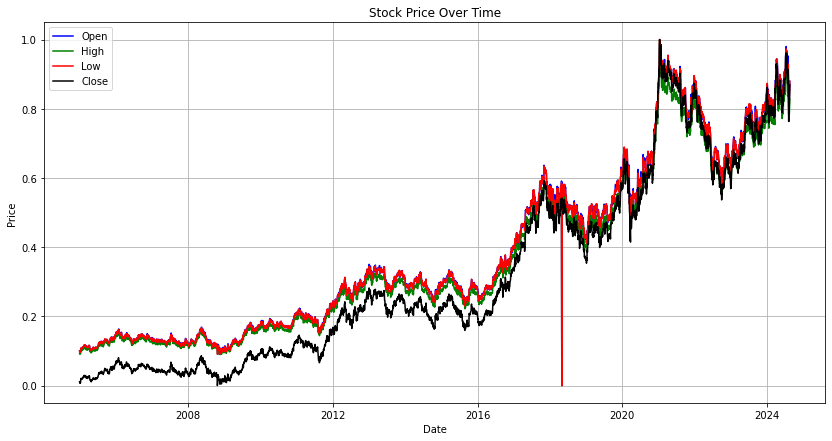

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))

# Open, High, Low, Close 시계열 그래프
plt.plot(scaled_df.index, scaled_df['Open'], label='Open', color='blue')
plt.plot(scaled_df.index, scaled_df['High'], label='High', color='green')
plt.plot(scaled_df.index, scaled_df['Low'], label='Low', color='red')
plt.plot(scaled_df.index, scaled_df['Close'], label='Close', color='black')

plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

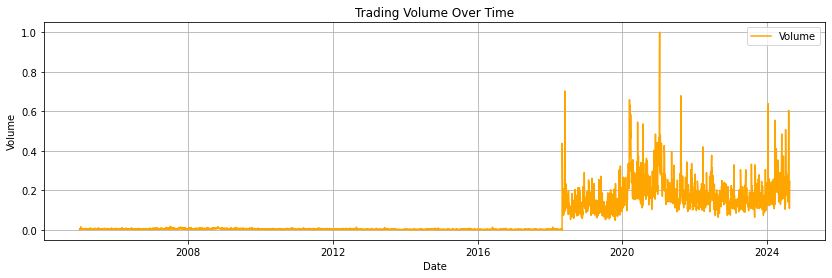

In [18]:
plt.figure(figsize=(14, 4))

plt.plot(scaled_df.index, scaled_df['Volume'], label='Volume', color='orange')

plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

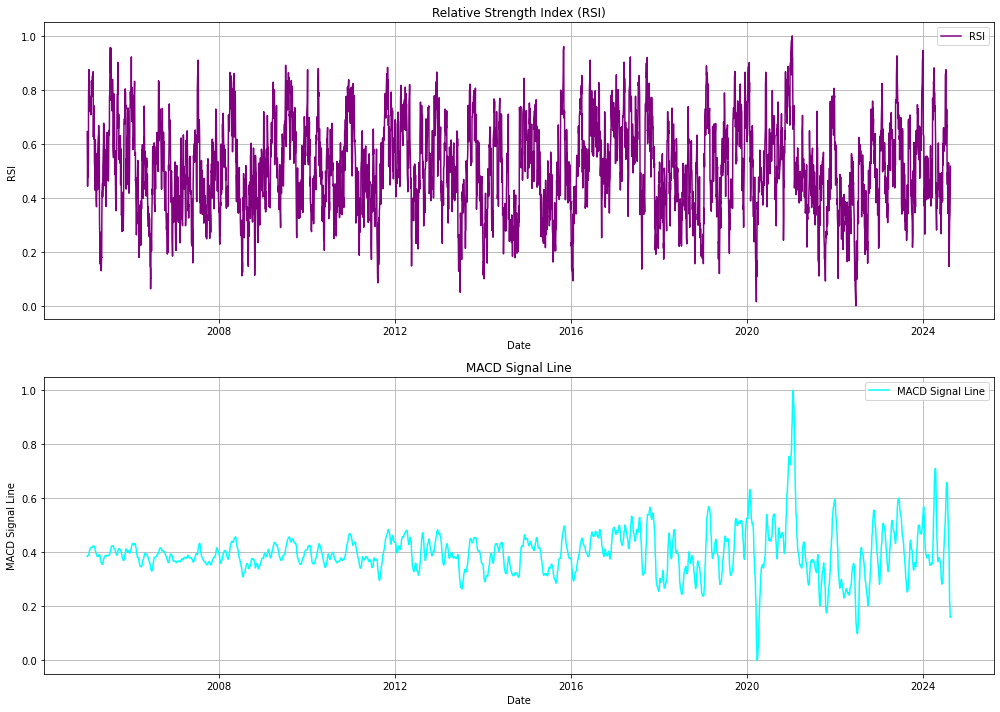

In [19]:
plt.figure(figsize=(14, 10))

# RSI 시계열 그래프
plt.subplot(2, 1, 1)
plt.plot(scaled_df.index, scaled_df['RSI'], label='RSI', color='purple')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)

# MACD 시계열 그래프
plt.subplot(2, 1, 2)
plt.plot(scaled_df.index, scaled_df['MACD_sig'], label='MACD Signal Line', color='cyan')
plt.title('MACD Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD Signal Line')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


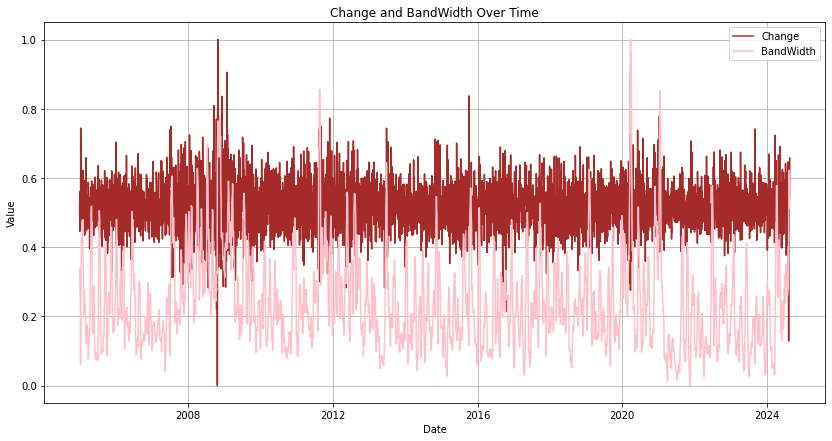

In [20]:
plt.figure(figsize=(14, 7))

# 변화율 시계열 그래프
plt.plot(scaled_df.index, scaled_df['Change'], label='Change', color='brown')

# BandWidth 시계열 그래프
plt.plot(scaled_df.index, scaled_df['BandWidth'], label='BandWidth', color='pink')

plt.title('Change and BandWidth Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\USER\anaconda3\lib\site-packages\seaborn\matrix.py:332: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  ax.figure.draw(ax.figure.canvas.get_renderer())
C:\Users\USER\anaconda3\lib\site-packages\seaborn\matrix.py:332: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  ax.figure.draw(ax.figure.canvas.get_renderer())
C:\Users\USER\anaconda3\lib\site-packages\seaborn\matrix.py:332: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  ax.figure.draw(ax.figure.canvas.get_renderer())
C:\Users\USER\anaconda3\lib\site-packages\seaborn\matrix.py:332: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.
  ax.figure.draw(ax.figure.canvas.get_renderer())
C:\Users\USER\anaconda3\lib\site-packages\seaborn\matrix.py:332: UserWarning: Glyph 46973 (\N{HANGUL SYLLABLE RAG}) missing from current font.
  ax.figure.draw(ax.figure.canvas.get_renderer())
C:\Users\USER\anaconda3\lib\site-p

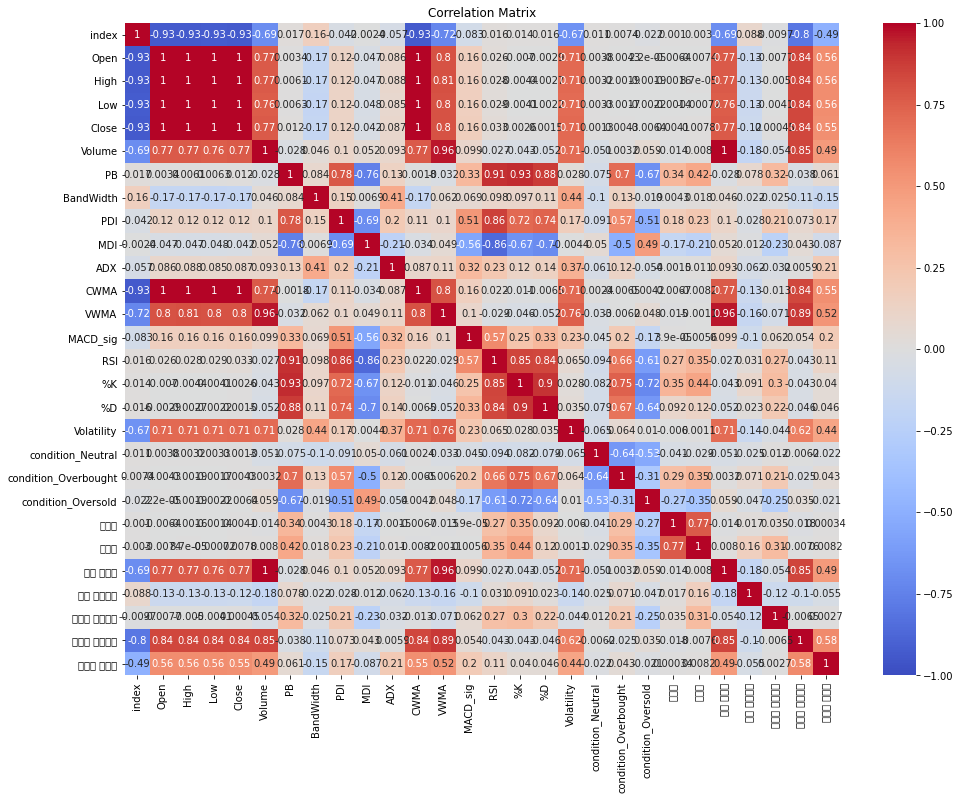

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 계산
correlation_matrix = scaled_df.corr()

plt.figure(figsize=(16, 12))

# 히트맵 시각화
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


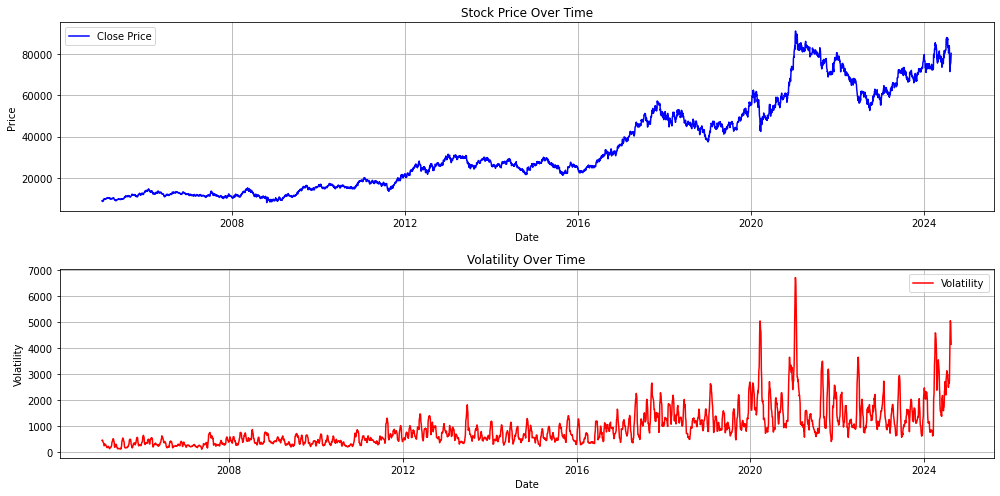

In [22]:
# 변동성 시각화 (표준편차를 사용하여 변동성 계산)
# 이 예제에서는 rolling window를 사용하여 변동성 계산
window_size = 20  # 30일 이동 윈도우

# 시각화
plt.figure(figsize=(14, 7))

# 주가와 변동성의 시계열 그래프를 그립니다.
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(df.index, df['Volatility'], label='Volatility', color='red')
plt.title('Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### 이상치 확인

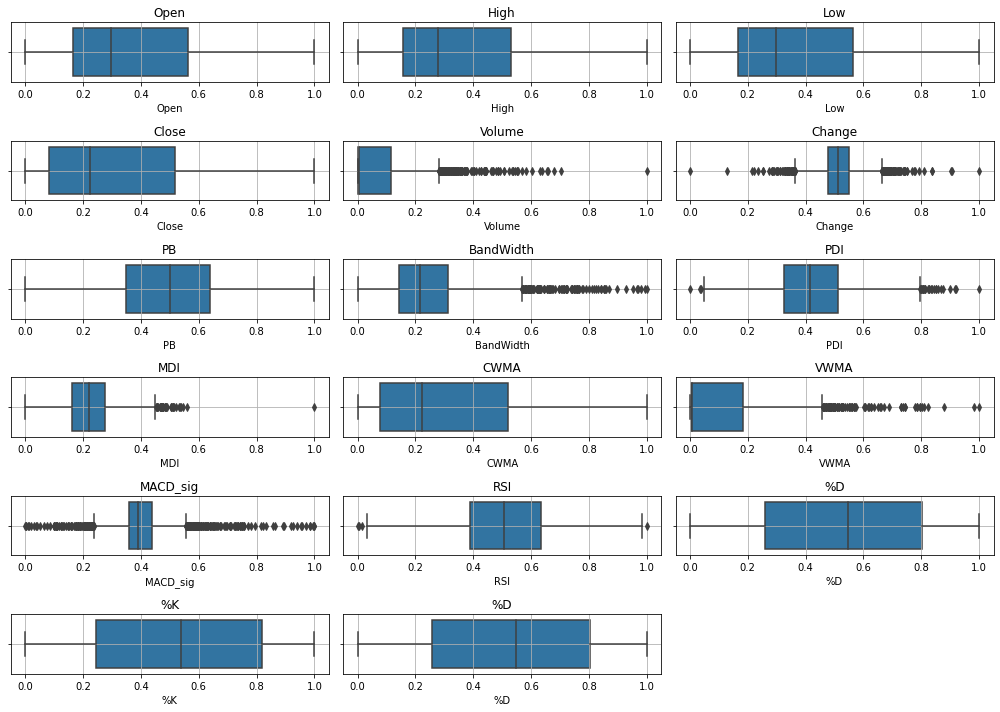

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 (실제 데이터로 대체하세요)
# scaled_df = pd.read_csv('path_to_your_data.csv')

plt.figure(figsize=(14, 10))

# 피처 리스트
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Change', 'PB', 'BandWidth', 'PDI', 'MDI', 'CWMA', 'VWMA', 'MACD_sig', 'RSI', '%D', '%K', '%D']

# 상자 수염 그림 생성
for i, feature in enumerate(features):
    plt.subplot(len(features) // 3 + 1, 3, i + 1)
    sns.boxplot(x=scaled_df[feature])
    plt.title(feature)
    plt.grid(True)

plt.tight_layout()
plt.show()


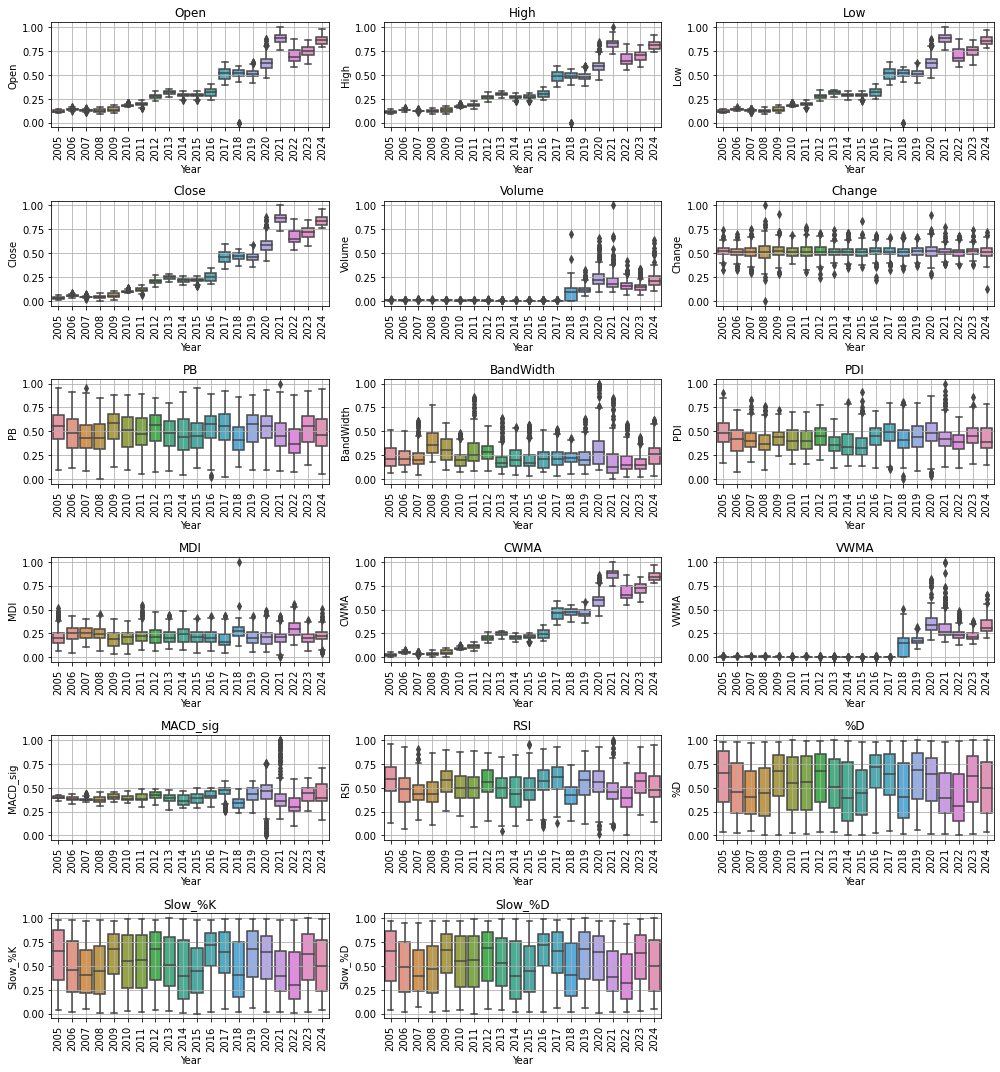

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 (실제 데이터로 대체하세요)
# scaled_df = pd.read_csv('path_to_your_data.csv', index_col='Date', parse_dates=True)

# 연도별로 그룹화
scaled_df['Year'] = scaled_df.index.year
years = scaled_df['Year'].unique()

plt.figure(figsize=(14, 15))

# 피처 리스트
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Change', 'PB', 'BandWidth', 'PDI', 'MDI', 'CWMA', 'VWMA', 'MACD_sig', 'RSI', '%D', '%K', '%D']

# 연도별 상자 수염 그림 생성
for i, feature in enumerate(features):
    plt.subplot(len(features) // 3 + 1, 3, i + 1)
    sns.boxplot(x='Year', y=feature, data=scaled_df)
    plt.title(feature)
    plt.xticks(rotation=90)
    plt.grid(True)

plt.tight_layout()
plt.show()


## 모델링


### 1) window_size = 20으로 설정하여 단기 분석

In [56]:
#train, test set 분할
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_df.drop('Close', 1), scaled_df['Close'], test_size=0.2, random_state=0, shuffle=False)

import tensorflow as tf
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

#window_size : 시계열 예측을 위해 사용할 데이터 최근 갯수
WINDOW_SIZE=20
BATCH_SIZE=32

# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [57]:
x_test

,index,Open,High,Low,Volume,PB,BandWidth,PDI,MDI,ADX,...,condition_Neutral,condition_Overbought,condition_Oversold,전일비,등락률,기업 거래량,개인 순매매량,외국인 순매매량,외국인 보유주수,외국인 보유율
3880,0.200000,0.635659,0.606405,0.639106,0.349007,0.666219,0.241196,0.599222,0.171141,0.228345,...,0.0,1.0,0.0,0.577419,0.658336,0.349007,0.836489,0.659866,0.963000,0.962937
3881,0.199794,0.644518,0.612603,0.645810,0.338818,0.637462,0.243393,0.615945,0.156376,0.247006,...,0.0,1.0,0.0,0.567339,0.494219,0.338818,0.773594,0.618291,0.963664,0.963627
3882,0.199588,0.663344,0.619835,0.660335,0.331354,0.704750,0.246583,0.658230,0.146920,0.270475,...,0.0,1.0,0.0,0.571774,0.564342,0.331354,0.730073,0.676613,0.965301,0.965351
3883,0.199381,0.656700,0.613636,0.650279,0.177364,0.683088,0.250808,0.586956,0.182411,0.276403,...,0.0,1.0,0.0,0.567742,0.500559,0.177364,0.739234,0.564638,0.965146,0.965178
3884,0.199175,0.666667,0.628099,0.669274,0.228647,0.760324,0.286442,0.700756,0.170765,0.294498,...,0.0,1.0,0.0,0.574194,0.601641,0.228647,0.802281,0.596659,0.965579,0.965523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4846,0.000825,0.838317,0.783058,0.829050,0.181474,0.304294,0.622128,0.380371,0.400397,0.327942,...,1.0,0.0,0.0,0.573790,0.579261,0.181474,0.765197,0.586501,0.966648,0.966557
4847,0.000619,0.832780,0.784091,0.835754,0.108954,0.340338,0.619312,0.371647,0.386299,0.328018,...,1.0,0.0,0.0,0.571774,0.553152,0.108954,0.768494,0.584993,0.966743,0.966730
4848,0.000412,0.847176,0.791322,0.843575,0.118666,0.368325,0.592612,0.392996,0.367869,0.322447,...,1.0,0.0,0.0,0.570968,0.542708,0.118666,0.760769,0.610267,0.967345,0.967247
4849,0.000206,0.857143,0.803719,0.860335,0.146681,0.410859,0.560476,0.424491,0.334880,0.307811,...,1.0,0.0,0.0,0.572984,0.567326,0.146681,0.760083,0.613869,0.967955,0.967937


In [58]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda,Bidirectional
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 모델 정의
model1 = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    
    # 양방향 LSTM
    Bidirectional(LSTM(16, activation='tanh')),
    
    # Dense 레이어
    Dense(16, activation="relu"),
    Dense(1),
])

In [60]:
import os
loss = Huber()
optimizer = Adam(0.005)
model1.compile(loss=Huber(), optimizer = optimizer, metrics = ['mse'])

#earlystopping 
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 10)
#val_loss 기준 체크포인터도 생성
filename = os.path.join('tmp', 'checkpointer.ckpt')
checkpoint = ModelCheckpoint(filename,
                            save_weights_only = True,
                            save_best_only=True,
                            monitor='val_loss',
                            verbose=1)

history = model1.fit(train_data,
                    validation_data=(test_data),
                    epochs=50,
                    callbacks=[checkpoint, earlystopping])

model1.load_weights(filename)
pred1 = model1.predict(test_data)

Epoch 1/50
    121/Unknown - 12s 24ms/step - loss: 1.5934e-04 - mse: 3.1868e-04
Epoch 1: val_loss improved from inf to 0.00120, saving model to tmp\checkpointer.ckpt
121/121 [==============================] - 14s 42ms/step - loss: 1.5934e-04 - mse: 3.1868e-04 - val_loss: 0.0012 - val_mse: 0.0024
Epoch 2/50
121/121 [==============================] - ETA: 0s - loss: 1.2335e-04 - mse: 2.4670e-04
Epoch 2: val_loss improved from 0.00120 to 0.00048, saving model to tmp\checkpointer.ckpt
121/121 [==============================] - 4s 29ms/step - loss: 1.2335e-04 - mse: 2.4670e-04 - val_loss: 4.7578e-04 - val_mse: 9.5156e-04
Epoch 3/50
121/121 [==============================] - ETA: 0s - loss: 6.4634e-05 - mse: 1.2927e-04
Epoch 3: val_loss improved from 0.00048 to 0.00027, saving model to tmp\checkpointer.ckpt
121/121 [==============================] - 4s 28ms/step - loss: 6.4634e-05 - mse: 1.2927e-04 - val_loss: 2.6823e-04 - val_mse: 5.3646e-04
Epoch 4/50
120/121 [============================>

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D ,Dropout, Lambda,Bidirectional, BatchNormalization
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error


model2 = Sequential([
    # Conv1D 레이어 (필터 수 증가, 배치 정규화 추가)
    Conv1D(filters=64, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    BatchNormalization(),
    
    # 양방향 LSTM 레이어 (유닛 수 증가, 드롭아웃 추가)
    Bidirectional(LSTM(64, activation='tanh', return_sequences=True)),
    Dropout(0.2),
    
    # 추가 LSTM 레이어
    Bidirectional(LSTM(32, activation='tanh')),
    Dropout(0.2),
    
    # Dense 레이어 (뉴런 수 증가, 배치 정규화 추가)
    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    
    # 출력 레이어
    Dense(1),
])

model2.compile(optimizer='adam', loss='mse')

In [62]:
import os
loss = Huber()
optimizer = Adam(0.005)
model2.compile(loss=Huber(), optimizer = optimizer, metrics = ['mse'])

#earlystopping 
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 10)
#val_loss 기준 체크포인터도 생성
filename = os.path.join('tmp', 'checkpointer.ckpt')
checkpoint = ModelCheckpoint(filename,
                            save_weights_only = True,
                            save_best_only=True,
                            monitor='val_loss',
                            verbose=1)

history = model2.fit(train_data,
                    validation_data=(test_data),
                    epochs=50,
                    callbacks=[checkpoint, earlystopping])

model2.load_weights(filename)
pred2 = model2.predict(test_data)

Epoch 1/50
    121/Unknown - 27s 59ms/step - loss: 0.0552 - mse: 0.1273
Epoch 1: val_loss improved from inf to 0.08682, saving model to tmp\checkpointer.ckpt
121/121 [==============================] - 33s 104ms/step - loss: 0.0552 - mse: 0.1273 - val_loss: 0.0868 - val_mse: 0.1736
Epoch 2/50
121/121 [==============================] - ETA: 0s - loss: 0.0046 - mse: 0.0091
Epoch 2: val_loss improved from 0.08682 to 0.06992, saving model to tmp\checkpointer.ckpt
121/121 [==============================] - 15s 125ms/step - loss: 0.0046 - mse: 0.0091 - val_loss: 0.0699 - val_mse: 0.1398
Epoch 3/50
120/121 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0075
Epoch 3: val_loss improved from 0.06992 to 0.04361, saving model to tmp\checkpointer.ckpt
121/121 [==============================] - 10s 76ms/step - loss: 0.0038 - mse: 0.0075 - val_loss: 0.0436 - val_mse: 0.0872
Epoch 4/50
121/121 [==============================] - ETA: 0s - loss: 0.0041 - mse: 0.0083
Epoch 4: val_loss 

In [150]:
# # 매매동향 추가하기 전 성능 ( 모델 디벨롭 발표할 때 매매동향 넣은 게 안 넣은 것 보다 크다고 하면 될듯)
# from sklearn.metrics import mean_squared_error
# mse1 = mean_squared_error(y_test[20:], pred1)
# mse2 = mean_squared_error(y_test[20:], pred2)
# print(mse1, mse2) #0.0002413060935491102  , 0.006810604914199216

# # 복잡한 모델2보다 모델 1의 성능이 더 좋음
# # 경제지표 추가한 것이 성능이 더 좋음.

0.0002413060935491102 0.006810604914199216


In [63]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test[20:], pred1)
mse2 = mean_squared_error(y_test[20:], pred2)
print(mse1, mse2)

0.0002040306896419866 0.002537462345048256


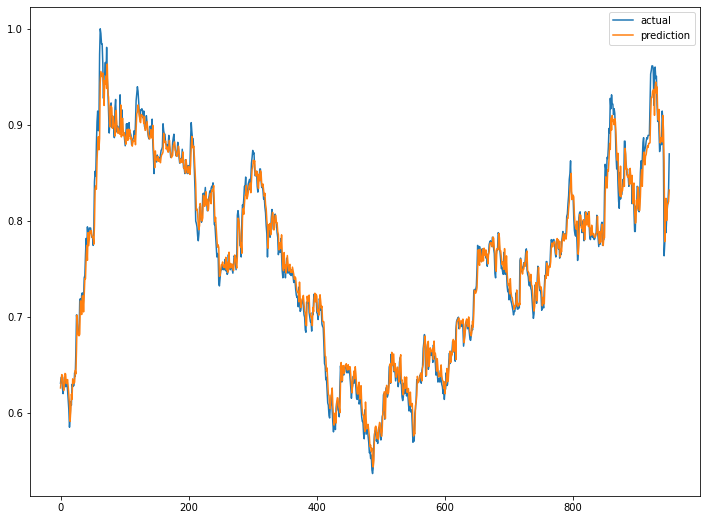

In [64]:
#예측데이터 시각화
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred1, label='prediction')
plt.legend()
plt.show()

### 2) window_size = 200으로 설정하여 장기 분석

In [65]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df.drop('Close', 1), scaled_df['Close'], test_size=0.2, random_state=0, shuffle=False)

import tensorflow as tf
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

#window_size : 시계열 예측을 위해 사용할 데이터 최근 갯수
WINDOW_SIZE=200
BATCH_SIZE=32

# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

# 모델 정의
model1 = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    
    # 양방향 LSTM
    Bidirectional(LSTM(16, activation='tanh')),
    
    # Dense 레이어
    Dense(16, activation="relu"),
    Dense(1),
])

import os
loss = Huber()
optimizer = Adam(0.005)
model1.compile(loss=Huber(), optimizer = optimizer, metrics = ['mse'])

#earlystopping 
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 10)
#val_loss 기준 체크포인터도 생성
filename = os.path.join('tmp', 'checkpointer.ckpt')
checkpoint = ModelCheckpoint(filename,
                            save_weights_only = True,
                            save_best_only=True,
                            monitor='val_loss',
                            verbose=1)

history = model1.fit(train_data,
                    validation_data=(test_data),
                    epochs=50,
                    callbacks=[checkpoint, earlystopping])

model1.load_weights(filename)
pred1 = model1.predict(test_data)

Epoch 1/50
    115/Unknown - 27s 158ms/step - loss: 1.7826e-04 - mse: 3.5652e-04
Epoch 1: val_loss improved from inf to 0.00135, saving model to tmp\checkpointer.ckpt
115/115 [==============================] - 30s 184ms/step - loss: 1.7826e-04 - mse: 3.5652e-04 - val_loss: 0.0013 - val_mse: 0.0027
Epoch 2/50
115/115 [==============================] - ETA: 0s - loss: 7.9810e-05 - mse: 1.5962e-04
Epoch 2: val_loss improved from 0.00135 to 0.00081, saving model to tmp\checkpointer.ckpt
115/115 [==============================] - 21s 179ms/step - loss: 7.9810e-05 - mse: 1.5962e-04 - val_loss: 8.0876e-04 - val_mse: 0.0016
Epoch 3/50
115/115 [==============================] - ETA: 0s - loss: 6.1408e-05 - mse: 1.2282e-04
Epoch 3: val_loss improved from 0.00081 to 0.00055, saving model to tmp\checkpointer.ckpt
115/115 [==============================] - 31s 268ms/step - loss: 6.1408e-05 - mse: 1.2282e-04 - val_loss: 5.4861e-04 - val_mse: 0.0011
Epoch 4/50
115/115 [==============================]

## 중요 변수 추출 - 그래프 그리기 실패,,

## 1) feature importance

모델에서 각 피처(변수)가 예측 결과에 얼마나 큰 영향을 미치는지를 나타내는 지표

* 이를 이용하면 모델이 어떤 피처를 주로 활용하여 예측을 수행하는지 파악할 수 있음.
* 중요한 피처들은 모델의 예측에 큰 영향을 미치는 요소로 간주됨



In [44]:
# from tensorflow.keras.losses import mean_squared_error

# X = scaled_df.drop('Close', 1)
# base_error = mean_squared_error(y_test[20:], pred1)

# # Permutation Importance 계산 함수
# def permute_feature(X, y, model, metric):
#     importances = []
#     for i in range(X.shape[1]):  # 각 feature에 대해
#         X_permuted = np.copy(X)
#         np.random.shuffle(X_permuted[:, i])  # 각 feature의 값을 섞음
#         y_pred = model.predict(X_permuted)
        
#         # y_pred의 차원을 맞추기 위해 flatten
#         y_pred = y_pred.flatten()
        
#         # y와 y_pred의 크기가 같아야 함
#         if len(y) != len(y_pred):
#             raise ValueError(f"Size mismatch: y has {len(y)} elements but y_pred has {len(y_pred)} elements")
        
#         permuted_error = metric(y[-len(y_pred):], y_pred)  # y_test를 y_pred 길이에 맞게 슬라이싱
#         importances.append(permuted_error - base_error)  # 기준 에러와 비교
#     return np.array(importances)

# feature_importance = permute_feature(x_test, y_test, model1, mean_squared_error)
# print("Feature Importances:", feature_importance)

31/31 [==============================] - 0s 11ms/step
Feature Importances: [[0.38162753 0.38315576 0.3850356  ... 0.3969342  0.39594105 0.39444095]
 [0.38174486 0.3832731  0.38515294 ... 0.39705154 0.39605838 0.39455828]
 [0.38174802 0.38327625 0.3851561  ... 0.3970547  0.39606154 0.39456144]
 ...
 [0.3555752  0.35710344 0.35898328 ... 0.3708819  0.36988872 0.36838862]
 [0.3514379  0.35296613 0.35484597 ... 0.36674458 0.36575142 0.36425132]
 [0.37268797 0.3742162  0.37609604 ... 0.38799465 0.38700148 0.38550138]]
